In [23]:
import os
import sys
AbsPath = str(os.path.abspath(""))+"/../.."
sys.path.append(AbsPath)
import importlib
import pickle
import numpy as np
import matplotlib as mpl
import colossus.halo.mass_adv as massdefs
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import matplotlib.ticker as tik
from matplotlib import cm
ColourMap = cm.RdBu
from Functions import Functions as F
from Scripts.Plots import SDSS_Plots
Add_SDSS = SDSS_Plots.SDSS_Plots(11.5,15,0.1) #pass this halomass:min, max, and binwidth for amting the SDSS plots
from colossus.cosmology import cosmology
cosmology.setCosmology("planck15")
Cosmo =cosmology.getCurrent()
HMF_fun = F.Make_HMF_Interp() #N Mpc^-3 h^3 dex^-1, Args are (Mass, Redshift)
h = Cosmo.h
h_3 = h*h*h

/data/pg1g15/STEEL/Notebooks/Plots/../../Scripts/Plots/SDSS_Plots.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.df_cent.loc[self.Photomotry] = self.df_cent[self.Photomotry] + 0.025


FRACKSKY= 0.1404020420493216


In [2]:
importlib.reload(F)

<module 'Functions.Functions' from '/data/pg1g15/STEEL/Notebooks/Plots/../../Functions/Functions.py'>

In [114]:
#set plot paramaters here
plt.rcParams['ytick.minor.visible']=True
plt.rcParams['xtick.minor.visible']=True
plt.rcParams['axes.linewidth']=2
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
mpl.rcParams['axes.titlepad'] = 20
plt.rcParams['font.size']=15
plt.rcParams['lines.linewidth']=2

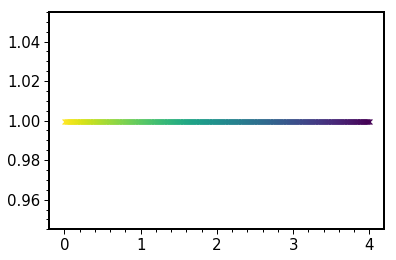

In [26]:
ColourMap = cm.viridis_r
def GetColour(z):
    if z>4: z = 4
    return ColourMap(float((z/4)))

for i in np.arange(0, 4, 0.01):
    plt.plot(i, 1,"x", color = GetColour(i))
plt.show()    

In [4]:
#Abundance Matching Parameters
Override =\
{\
'M10':12.0,\
'SHMnorm10':0.032,\
'beta10':1.5,\
'gamma10':0.56,\
'M11':0.6,\
'SHMnorm11':-0.014,\
'beta11':-0.7,\
'gamma11':0.08\
}

AbnMtch =\
{\
'Behroozi13': False,\
'Behroozi18': False,\
'B18c':False,\
'B18t':False,\
'G18':False,\
'G18_notSE':False,\
'G19_SE':False,\
'G19_cMod':False,\
'Lorenzo18':False,\
'Moster': False,\
'Moster10': False,\
'Illustris':False,\
'z_Evo':True,\
'Scatter': 0.15,\
'Override_0': False,\
'Override_z': False,\
'Override': Override,\
'PFT': False,\
'M_PFT1': False,\
'M_PFT2': False,\
'M_PFT3': False,\
'N_PFT1': False,\
'N_PFT2': False,\
'N_PFT3': False,\
'b_PFT1': False,\
'b_PFT2': False,\
'b_PFT3': False,\
'g_PFT1': False,\
'g_PFT2': False,\
'g_PFT3': False\
}

Paramaters = \
{\
'AbnMtch' : AbnMtch,\
'AltDynamicalTime': 1,\
'NormRnd': 0.5,\
'SFR_Model': 'CE'\
}

In [43]:
z_arr, SubHaloMass, NumberDensities = F.LoadData_MultiEpoch_SubHalos(('1.0', False, False, True, 'G19_DPL', 'G19_SE'))

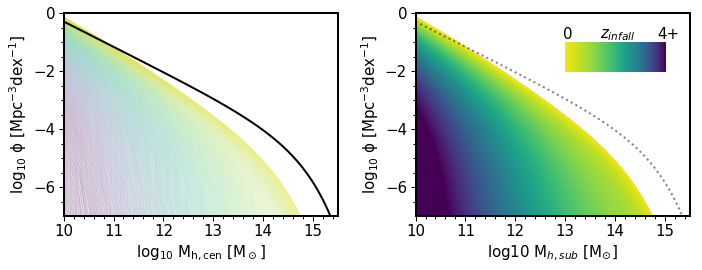

In [123]:
f, Plots = plt.subplots(1,2, figsize=(10,4))



Halo_MR = np.arange(10, 15.5, 0.1)
Plots[0].plot(Halo_MR,np.log10(HMF_fun(Halo_MR, 0)), "k")
Plots[0].set_xlabel("$\mathrm{log_{10}}$ $\mathrm{M_{h, cen}}$ $\mathrm{[M_\odot]}$")
Plots[0].set_ylabel("$\mathrm{log_{10}}$ $\mathrm{\phi}$ $\mathrm{[Mpc^{-3}dex^{-1}]}$")
Plots[0].set_xlim(10, 15.5)
Plots[0].set_ylim(-7, 0)


Lower = np.full_like(SubHaloMass, 10**(-300))
for NumberDen, z in zip(np.flipud(NumberDensities[2]), np.flip(z_arr)):
    Upper = Lower + NumberDen
    """
    print(np.log10(NumberDen))
    print(np.log10(Lower))
    print(np.log10(Upper))
    #"""
    Plots[1].fill_between(SubHaloMass, np.log10(Lower), np.log10(Upper), color = GetColour(z))
    Plots[0].fill_between(SubHaloMass, np.log10(Lower), np.log10(Upper), color = GetColour(z), alpha = 0.1)
    Lower = Upper
    
#LoopForPatch
for i, z in enumerate(z_arr[z_arr<4]):
    Start = (2*(i/len(z_arr[z_arr<4])))
    Stop = (2*((i+1)/len(z_arr[z_arr<4])))
    Patch = mpl.patches.Polygon([[13+Start,-1], [13+Start,-2], [13+Stop,-2], [13+Stop,-1]], closed = True, fill = True, visible = True, color = GetColour(z)) 
    Plots[1].add_patch(Patch)
Plots[1].text(12.95, -0.9, "0")
Plots[1].text(13.7, -0.85, r"$z_{infall}$")
Plots[1].text(14.85, -0.9, "4+")
Plots[1].set_ylim(-7, 0.0)
Plots[1].set_xlim(10, 15.5)
Plots[1].set_ylabel("$\mathrm{log_{10}}$ $\mathrm{\phi}$ $\mathrm{[Mpc^{-3}dex^{-1}]}$")
Plots[1].set_xlabel("log10 M$_{h, sub}$ [M$_{\odot}$]")
Plots[1].plot(Halo_MR,np.log10(HMF_fun(Halo_MR, 0)), ":k", alpha = 0.5)


plt.tight_layout()
plt.savefig(AbsPath+"/Figures/Thesis/Intro/SubHaloes_byz.png")
plt.savefig(AbsPath+"/Figures/Thesis/Intro/SubHaloes_byz.pdf")
plt.show()

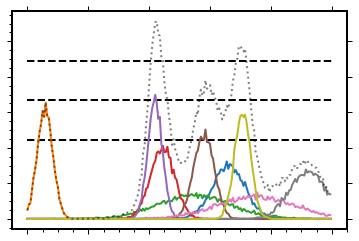

In [238]:
X = np.arange(0, 100, 0.5)
Total = np.zeros_like(X)
for i in range(1, 10):
    Hist, Bins = np.histogram(np.random.normal(loc = np.random.rand()*100, scale = np.random.rand()*15, size = 10000), bins = np.append(X, X[-1]+0.5))
    Total = Total + Hist
    plt.plot(X, Hist)
plt.plot(X, Total, ":k", alpha = 0.5)
Max = np.max(Total)
plt.hlines([0.8*Max, 0.6*Max, 0.4*Max], 0, 100, linestyles = "dashed")
plt.tick_params(axis='both', left=True, top=True, right=True, bottom=True, labelleft=False, labeltop=False, labelright=False, labelbottom=False)
plt.savefig("EPS_Cartoon.png")
plt.show()

In [239]:
import matplotlib
for name, hex in matplotlib.colors.cnames.items():
    print(name, hex)

aliceblue #F0F8FF
antiquewhite #FAEBD7
aqua #00FFFF
aquamarine #7FFFD4
azure #F0FFFF
beige #F5F5DC
bisque #FFE4C4
black #000000
blanchedalmond #FFEBCD
blue #0000FF
blueviolet #8A2BE2
brown #A52A2A
burlywood #DEB887
cadetblue #5F9EA0
chartreuse #7FFF00
chocolate #D2691E
coral #FF7F50
cornflowerblue #6495ED
cornsilk #FFF8DC
crimson #DC143C
cyan #00FFFF
darkblue #00008B
darkcyan #008B8B
darkgoldenrod #B8860B
darkgray #A9A9A9
darkgreen #006400
darkgrey #A9A9A9
darkkhaki #BDB76B
darkmagenta #8B008B
darkolivegreen #556B2F
darkorange #FF8C00
darkorchid #9932CC
darkred #8B0000
darksalmon #E9967A
darkseagreen #8FBC8F
darkslateblue #483D8B
darkslategray #2F4F4F
darkslategrey #2F4F4F
darkturquoise #00CED1
darkviolet #9400D3
deeppink #FF1493
deepskyblue #00BFFF
dimgray #696969
dimgrey #696969
dodgerblue #1E90FF
firebrick #B22222
floralwhite #FFFAF0
forestgreen #228B22
fuchsia #FF00FF
gainsboro #DCDCDC
ghostwhite #F8F8FF
gold #FFD700
goldenrod #DAA520
gray #808080
green #008000
greenyellow #ADFF2F
